In [1]:

import pandas  as pandas
df = pandas.read_excel (r'C:\Users\amin\Desktop\worksop talet\Nouveau dossier\TOS_DI-Win32-20200219_1130-V7.3.1\workspace\vehiculenonSinstrer.xls')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
Voiture=df

In [4]:
Voiture=Voiture.replace('0',0)
Voiture=Voiture.replace('ESSENCE',1)
Voiture=Voiture.replace('GASOIL',2)
Voiture=Voiture.replace('ESS-GAZ GPL',3)
Voiture=Voiture.replace('ELECTRICITE',4)

In [5]:
Voiture

,Vehicule_id,Marque,UsageVehicule,PuissanceFiscale,Energie,Ptac,DateMiseEnCirculation,CodeMarque,CodeUsage,sinister
0,6390,VOLKSWAGEN,Privé et professionnel,4,1,5,2009,107,1,0
1,6391,RENAULT,Privé et professionnel,4,1,2,2010,30,1,0
2,6392,RENAULT,Privé et professionnel,4,1,6,2018,30,1,0
3,6393,RENAULT,Privé et professionnel,4,1,2,2014,30,1,0
4,6394,CITROEN,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,7,2,6,2016,12,5,0
...,...,...,...,...,...,...,...,...,...,...
1037754,1110339,ISUZU,Agricole1 véhicule dont le PTC < 3500 kg,17,2,9,2018,376,2,1
1037755,1110350,ISUZU,Agricole1 véhicule dont le PTC < 3500 kg,10,2,7,2011,376,2,1
1037756,1110370,NISSAN,Agricole1 véhicule dont le PTC < 3500 kg,13,2,1,2010,338,2,1
1037757,1110384,PEUGEOT,Privé et professionnel,5,1,9,2017,29,1,1


In [6]:
# vérifions le type de Voiture
print(type(Voiture))


<class 'pandas.core.frame.DataFrame'>


In [7]:
Voiture=Voiture.drop(columns=['Vehicule_id', 'Marque', 'UsageVehicule'])


In [8]:
Voiture.keys()

Index(['PuissanceFiscale', 'Energie', 'Ptac', 'DateMiseEnCirculation',
       'CodeMarque', 'CodeUsage', 'sinister'],
      dtype='object')

- Afficher df

In [9]:
y= Voiture['sinister']
X=Voiture.drop(columns=['sinister'])


In [10]:
X.shape

(1037759, 6)

In [11]:
y.shape

(1037759,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)# random_state=some_number pour garantir que votre split sera toujours le même

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier


In [21]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [22]:
dt = DecisionTreeClassifier(random_state=0)
classifier = MultiOutputClassifier(dt, n_jobs=-1)

In [23]:
# y_train.values_count()
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 0.865568787675636
Le test score est : 0.842465181416384


In [25]:
y_test.shape

(311328,)

Comme on peut le voir sur l'ensemble d'entraînement, le taux de bonne classif est 100% -->  un indicateur de sur-apprentissage.

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[260541   5088]
 [ 43957   1742]]


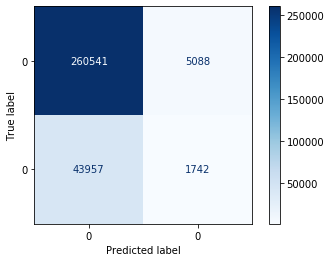

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=Voiture.sinister, cmap=plt.cm.Blues)
plt.show()

In [28]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8 ))



              precision    recall  f1-score   support

           0  0.85564109 0.98084546 0.91397531    265629
           1  0.25505124 0.03811900 0.06632527     45699

    accuracy                      0.84246518    311328
   macro avg  0.55534617 0.50948223 0.49015029    311328
weighted avg  0.76748212 0.84246518 0.78955104    311328



In [43]:
X.shape

(1037759, 6)

In [44]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,15)}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [48]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [33]:
final_model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=8)

In [34]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [35]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.8526384474230863
le test_score= 0.8532191129612499


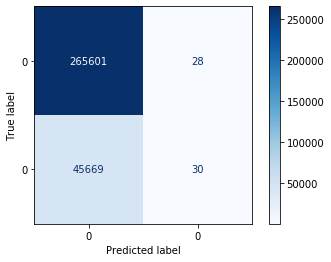

In [36]:
from sklearn.metrics import plot_confusion_matrix
y_pred = final_model.predict(X)
# plot_confusion_matrix(final_model, X_test, y_pred, display_labels=Voiture.sinister, cmap=plt.cm.Blues)
plot_confusion_matrix(final_model, X_test, y_test, display_labels=Voiture.sinister, cmap=plt.cm.Blues)
plt.show()

In [53]:
y_pred = final_model.predict(X_test)
X.columns

Index(['PuissanceFiscale', 'Energie', 'Ptac', 'DateMiseEnCirculation',
       'CodeMarque', 'CodeUsage'],
      dtype='object')

In [55]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
with open("amin.dot", 'w') as f:
    f = tree.export_graphviz(final_model, out_file=f, filled=True)

In [56]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, digits=8 ))


C:\Users\amin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0  0.85321269 1.00000000 0.92079306    265629
           1  0.00000000 0.00000000 0.00000000     45699

    accuracy                      0.85321269    311328
   macro avg  0.42660634 0.50000000 0.46039653    311328
weighted avg  0.72797189 0.85321269 0.78563232    311328



C:\Users\amin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
model = XGBClassifier(max_depth=10,n_estimators=300)
model.fit(X_train, y_train)

XGBClassifier(max_depth=10, n_estimators=300)

In [50]:
XGBClassifier?

In [47]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [48]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.27%


In [49]:
print(classification_report(y_test, y_pred, digits=8 ))

              precision    recall  f1-score   support

           0  0.85389954 0.99809509 0.92038381    265629
           1  0.39976275 0.00737434 0.01448154     45699

    accuracy                      0.85266985    311328
   macro avg  0.62683115 0.50273471 0.46743268    311328
weighted avg  0.78723803 0.85266985 0.78740885    311328

